<a href="https://colab.research.google.com/github/asokraju/ml-grinding/blob/master/mpg_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original". 

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

For more information visit https://archive.ics.uci.edu/ml/datasets/auto+mpg . 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import seaborn as sns
import warnings
import math
import random as random


- We will download the Auto MPG Data Set from UCI repository. 
- And save the data into auto.csv

In [0]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
url1= "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original"
names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df= pd.read_csv(url, names = names, sep = '\s+')
df.to_csv('auto.csv')
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Missing values
- Checking for missing values

In [0]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


- First look indicates that there are non missing values.
- However, Horsepower column has strings. 
- This can be an indication of some missing values encoded as strings such as '?0-*'.
- We will first verify this for the horsepower column.
- Later we scan the full dataset for the missing values.

In [0]:
print('Chking if the Horsepower feature has ?,0,-,* strings')

[print(a,a in df.horsepower.unique()) for a in '?0-*'];

Chking if the Horsepower feature has ?,0,-,* strings
? True
0 False
- False
* False


- Horsepower feature has '?' in its values. Let us see the complete rows
- Possibly, we will also chk if any other colums has '?' strings!

In [0]:
df[df['horsepower'].str.contains(r"\?")]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [0]:
mask = np.column_stack([df[col].astype(str).str.contains(r"\?") for col in df])
print(df[mask])

      mpg  cylinders  displacement  ... model_year  origin              car_name
32   25.0          4          98.0  ...         71       1            ford pinto
126  21.0          6         200.0  ...         74       1         ford maverick
330  40.9          4          85.0  ...         80       2  renault lecar deluxe
336  23.6          4         140.0  ...         80       1    ford mustang cobra
354  34.5          4         100.0  ...         81       2           renault 18i
374  23.0          4         151.0  ...         82       1        amc concord dl

[6 rows x 9 columns]


## Standardization of the dataset
- There are 6 missing values in horsepower column. 
- We can either remove the corresponding rows or try and fill these missing values.
- We will standardize the dataset firstly, by replacing '?' with np.nan
- Secondly, converting datatype of horsepower column to floats.
- Save the dataframe to auto_v1.csv

In [0]:
df.loc[df['horsepower'].str.contains(r"\?"),'horsepower'] = np.nan
print('='*40)
missing = df.isna().sum().sort_values(ascending = False)
missing_percent = round(df.isna().sum().sort_values(ascending = False)*100/df.shape[0],2)
missing_train = pd.concat([missing, missing_percent], axis = 1, keys = ['Total', 'Percent'])
missing_train = missing_train[missing_train.Total != 0]
print("Missing values in the data set")
print(missing_train)

df.to_csv('auto_v1.csv')

Missing values in the data set
            Total  Percent
horsepower      6     1.51


In [0]:
df['horsepower'] = df['horsepower'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


# Types of features

Types of features

Attribute Information:

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)

says that there are:

- 5 continious (float) i.e., mpg, displacement, horsepower, weight, acceleration
- 3 multi-valued discrete (catogorical integers) i.e., cylinders, model_year, origin
- 1 string (object) i.e., car_name

Let us first check the multi values discrete features and their unique values!

In [0]:
print('Unique values in CYLINDERS feature are',np.sort(df.cylinders.unique()))
print('Unique values in ORIGIN feature are',np.sort(df.origin.unique()))
print('Unique values in MODEL_YEAR feature are',np.sort(df.model_year.unique()))

Unique values in CYLINDERS feature are [3 4 5 6 8]
Unique values in ORIGIN feature are [1 2 3]
Unique values in MODEL_YEAR feature are [70 71 72 73 74 75 76 77 78 79 80 81 82]


- Note that the ORIGIN represents US, Europe and Asia. Hence we do not consider it as ordered.
- However, CYLINDERS feature is ordered.
- For now we will consider, MODEL_YEAR to be ordered. In later parts we will convert it into date-time atribute.

In [0]:
cylinders_cat_dtype = pd.api.types.CategoricalDtype(categories=np.sort(df.cylinders.unique()), ordered=True)
origin_cat_dtype = pd.api.types.CategoricalDtype(categories=np.sort(df.origin.unique()), ordered=False)
model_year_cat_dtype = pd.api.types.CategoricalDtype(categories=np.sort(df.model_year.unique()), ordered=True)
df['cat_cyl'] = df.cylinders.astype(cylinders_cat_dtype)
df['cat_org'] = df.origin.astype(origin_cat_dtype)
df['cat_year'] = df.model_year.astype(model_year_cat_dtype)

In [0]:
#print('chevrolet cars',df[df['car_name'].str.contains(r"chevrolet")].shape[0])
#print('buick cars',df[df['car_name'].str.contains(r"buick")].shape[0])
#print('plymouth cars',df[df['car_name'].str.contains(r"plymouth")].shape[0])
#print('amc cars',df[df['car_name'].str.contains(r"amc")].shape[0])
#print('ford cars',df[df['car_name'].str.contains(r"ford")].shape[0])

# Visualization

## Discrete variables 

### Company vs Mileage

- Catagorical feature

In this we add a new feature called company, which represent the company of the car. Moreover, we will check it has some correlation between the milage of the car. I think this is a vaid question to ask.


In [0]:
brand = {}
for car_name in df['car_name']:
    if car_name.split(" ")[0] not in brand:
        brand[car_name.split(" ")[0]] = 1
    else:
        brand[car_name.split(" ")[0]] = brand[car_name.split(" ")[0]] + 1
print('Total number of companies',len(brand))
#print(brand)
Car_bands = pd.DataFrame.from_dict(brand, orient='index')
Car_bands.columns = ['No_cars']
#Car_bands
print("Top ten occurring companies")
#print(Car_bands['No_cars'].sort_values(ascending = False).head(10))
temp = Car_bands['No_cars'].sort_values(ascending = False)
temp.index.name = 'Company'
temp.column = ['No_cars']
temp.head(10)

Total number of companies 37
Top ten occurring companies


Company
ford          51
chevrolet     43
plymouth      31
amc           28
dodge         28
toyota        25
datsun        23
buick         17
pontiac       16
volkswagen    15
Name: No_cars, dtype: int64

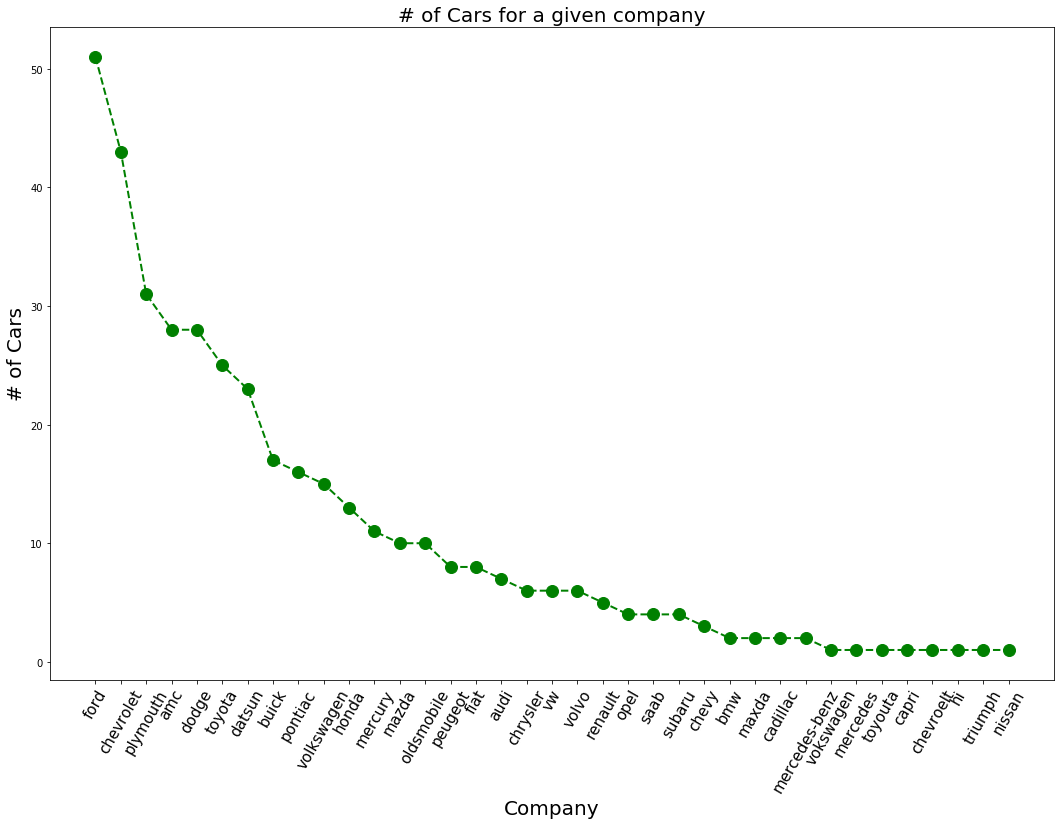

In [0]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (18,12))
plt.plot(temp, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
ax.set_title('# of Cars for a given company',fontsize=20)
ax.set_xlabel('Company',fontsize=20)
ax.set_ylabel('# of Cars',fontsize=20)
plt.xticks(rotation = '60', fontsize=15)
plt.show()


- Let us verify if this is correlated to the milage of the cars!
- We will add a new catogorical feature called COMPANY to the dataset

In [0]:
df['company'] = df['car_name'].apply(lambda x: x.split(' ')[0])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,cat_cyl,cat_org,cat_year,company
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,8,1,70,chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,8,1,70,buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,8,1,70,plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,8,1,70,amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,8,1,70,ford


In [0]:
company_cat_dtype = pd.api.types.CategoricalDtype(categories=np.sort(df.company.unique()), ordered=False)
df['company'] = df.company.astype(company_cat_dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 13 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
cat_cyl         398 non-null category
cat_org         398 non-null category
cat_year        398 non-null category
company         398 non-null category
dtypes: category(4), float64(5), int64(3), object(1)
memory usage: 32.2+ KB


In [0]:
temp2 = df.groupby('company')['mpg'].mean().sort_values(ascending = False)
company_avg_mpg = pd.merge(temp, temp2, left_index=True, right_index=True)
company_avg_mpg = company_avg_mpg.sort_values('mpg', ascending = False)
#company_avg_mpg.head()

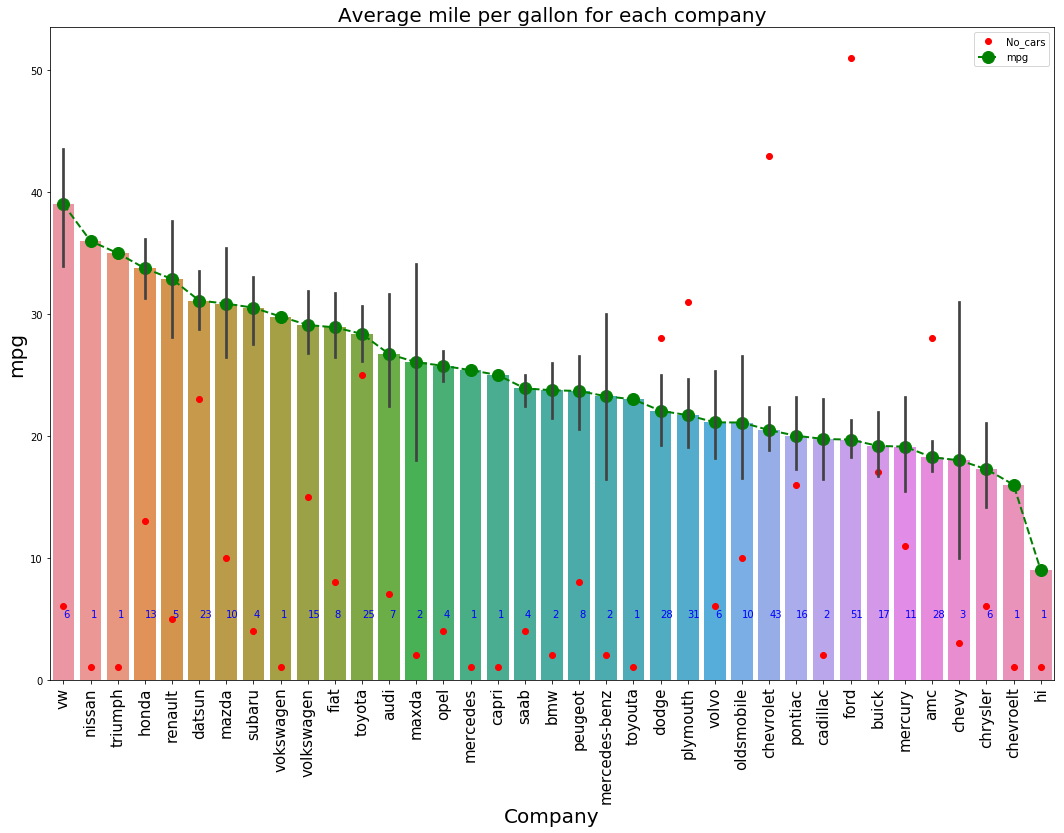

In [0]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (18,12))
plt.plot('No_cars', data = company_avg_mpg,  color='red', marker='.', linestyle='none', linewidth=2, markersize=12)
plt.plot('mpg', data = company_avg_mpg, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
sns.barplot(
    x='company',
    y='mpg',
    order = company_avg_mpg.index,
    data=df,
#palette=pal
)
ax.set_title('Average mile per gallon for each company',fontsize=20)
ax.set_xlabel('Company',fontsize=20)
ax.set_ylabel('mpg',fontsize=20)
plt.xticks(rotation = '90', fontsize=15)
for i, v in enumerate(company_avg_mpg["No_cars"].iteritems()):        
#    ax.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
    ax.text(i ,5, "{:,}".format(v[1]), color='b', va ='bottom', rotation=0)
plt.legend()
plt.show()

- Above we have plotted the average miles per gallon for a given company.
- However, it should be noted that the number car used to calculate this average varies a lot.
- This information can not be used directly, however there might be some correlation
- Cars produced by some companies have a very consistant milage (low variance)

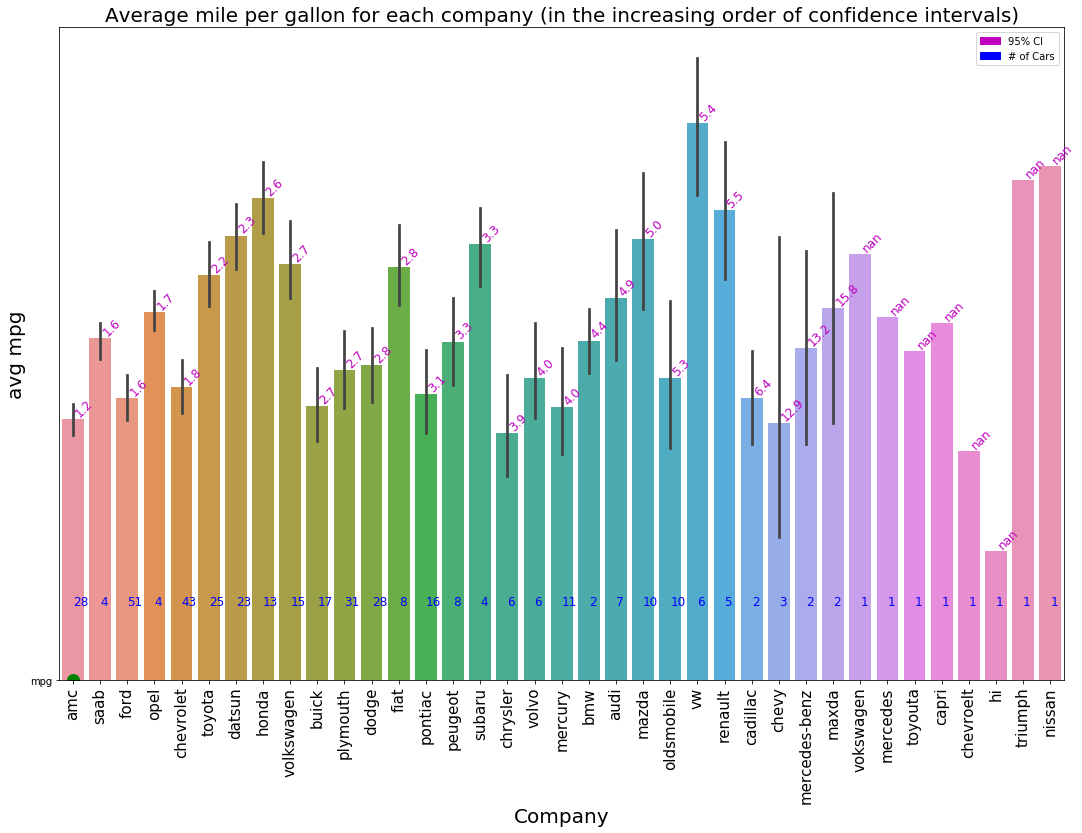

In [0]:
temp3 = df.groupby('company')['mpg'].agg(['mean', 'count', 'std'])
ci95_hi = []
ci95_lo = []
ci95 = []
for i in temp3.index:
    m, c, s = temp3.loc[i,['mean', 'count', 'std']]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))
    ci95.append(2*1.96*s/math.sqrt(c))

temp3['ci95_hi'] = ci95_hi
temp3['ci95_lo'] = ci95_lo
temp3['ci95'] = ci95
company_avg_mpg = pd.merge(temp, temp3, left_index=True, right_index=True)
company_avg_mpg = company_avg_mpg.sort_values('ci95', ascending = True)

company_avg_mpg = company_avg_mpg[company_avg_mpg['No_cars']>0]
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (18,12))
#plt.plot('No_cars', data = company_avg_mpg,  color='red', marker='.', linestyle='none', linewidth=2, markersize=12)
plt.plot('mpg', data = company_avg_mpg, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12)
sns.barplot(
    x='company',
    y='mpg',
    order = company_avg_mpg.index,
    data=df,
    #palette=sns.color_palette()#sns.color_palette("BuGn_r")
)
ax.set_title('Average mile per gallon for each company (in the increasing order of confidence intervals)',fontsize=20)
ax.set_xlabel('Company',fontsize=20)
ax.set_ylabel('avg mpg',fontsize=20)
plt.xticks(rotation = '90', fontsize=15)
for i,v in enumerate(company_avg_mpg[["ci95","mean","No_cars"]].values):
    ax.text(i ,v[1], "{:,}".format(round(v[0]/2,1)), color='m', va ='bottom', rotation=45, fontsize = 12)
    ax.text(i ,5, "{:,}".format(int(v[2])), color='b', va ='bottom', rotation=0, fontsize = 12)
#plt.legend()
red_patch = mpatches.Patch(color='m', label='95% CI')
blue_patch = mpatches.Patch(color='b', label='# of Cars')

plt.legend(handles=[red_patch, blue_patch])
plt.show()

There are some nice deductions here:

- We can band these companies based on their confidence intervals
- However, we have to make an assumption that a new test sample belongs to one of these companies..which is not true
- Another way is to make add all the new companies to a band called unknown
- In the train data, I will create band of [1,2), [2,,3), [3,4], [4,6], [6,nan]


### Cylinders vs Mileage

- Discrete feature
- Technically, as the number of cylinders increases the milage should decrease

In [0]:
temp1 = df.groupby('cat_cyl')['mpg'].mean().sort_values(ascending = False)
temp = pd.merge(temp1.reset_index(), 
         temp1.reset_index()['cat_cyl'].apply(lambda x: temp1[x]/x),
         left_index=True, 
         right_index=True)
temp.columns= ['cyl', 'mpg', 'mpg_per_cyl']
temp = temp.sort_values('cyl')
print(temp)

  cyl        mpg mpg_per_cyl
2   3  20.550000    6.850000
0   4  29.286765    7.321691
1   5  27.366667    5.473333
3   6  19.985714    3.330952
4   8  14.963107    1.870388


- However the above table indicate that having 4 cylinders have better milage and also milage per cylinder.
- This can be seen below
- Let us make a new feature called mpg_per_cyl with the data of milage per cylinder 
- Note that we remove it later as we cannot find this with out the knowledge of mileage :(

In [0]:
df['mpg_per_cyl'] = df['mpg']/df['cylinders']

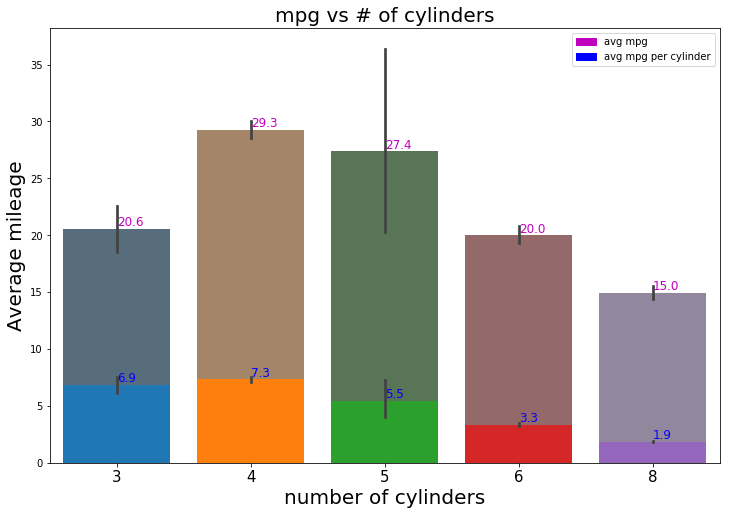

In [0]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,8))
sns.barplot(
    x='cat_cyl',
    y='mpg',
    saturation=.25,
    #order = df.cat_cyl,
    data=df,
#palette=pal
)
sns.barplot(
    x='cat_cyl',
    y='mpg_per_cyl',
    saturation=1,
    #order = df.cat_cyl,
    data=df,
    #palette=sns.color_palette('white')
)
ax.set_title('mpg vs # of cylinders',fontsize=20)
ax.set_xlabel('number of cylinders',fontsize=20)
ax.set_ylabel('Average mileage',fontsize=20)
plt.xticks(rotation = '0', fontsize=15)
for i,v in enumerate(temp.values):
    ax.text(i,v[1], "{:,}".format(round(v[1],1)), color='m', va ='bottom', rotation=0, fontsize = 12)
    ax.text(i ,v[2], "{:,}".format(round(v[2],1)), color='b', va ='bottom', rotation=0, fontsize = 12)
red_patch = mpatches.Patch(color='m', label='avg mpg')
blue_patch = mpatches.Patch(color='b', label='avg mpg per cylinder')

plt.legend(handles=[red_patch, blue_patch])
plt.show()

- Vehicles with 5 cylinders have a lot high confidance interval
- Cars with 4 cylinders have better milage compared to others

Let us see how this changes when hued by Origin of the cars

        # of cars         average mileage              
origin          1   2   3               1      2      3
cat_cyl                                                
3               -   -   4               -      -  20.55
4              72  63  69           27.84  28.41   31.6
5               -   3   -               -  27.37      -
6              74   4   6           19.66   20.1  23.88
8             103   -   -           14.96      -      -
________________________________________________________________________________



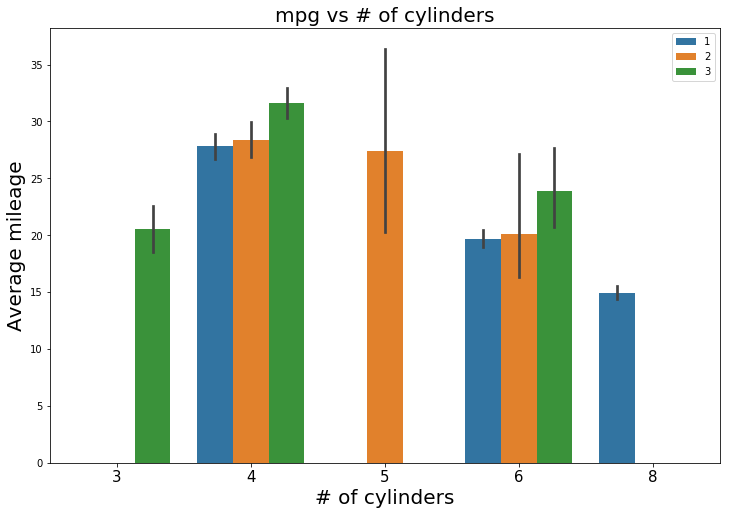

In [0]:
temp = round(pd.pivot_table(df, 
                            values='mpg', 
                            index=['cat_cyl'], 
                            columns='origin', 
                            aggfunc=[lambda x: len(x),'mean'] ),2)
temp.rename(columns={'<lambda>': '# of cars', 'mean':'average mileage'}, inplace=True)
temp.fillna('-', inplace = True)
print(temp)
print('_'*80+'\n')
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,8))
sns.barplot(
    x='cat_cyl',
    y='mpg',
    #saturation=.25,
    hue = 'origin',
    data=df,
#palette=pal
)
ax.set_title('mpg vs # of cylinders',fontsize=20)
ax.set_xlabel('# of cylinders',fontsize=20)
ax.set_ylabel('Average mileage',fontsize=20)
plt.xticks(rotation = '0', fontsize=15)
plt.legend()
plt.show()

- 3 cylinder cars are only from 3
- 5 cylinder cars are only from 2
- 8 cylinder cars are only from 1

- 4, 6 cylinder cars are available at all the places

Let us see the box plot for outliers

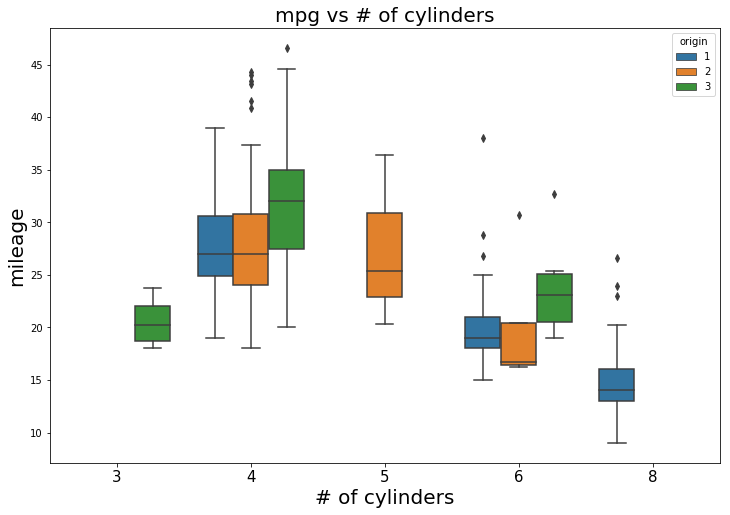

In [0]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (12,8))
sns.boxplot(
    x='cat_cyl',
    y='mpg',
    #saturation=.25,
    hue = 'origin',
    data=df,
#palette=pal
)
ax.set_title('mpg vs # of cylinders',fontsize=20)
ax.set_xlabel('# of cylinders',fontsize=20)
ax.set_ylabel('mileage',fontsize=20)
plt.xticks(rotation = '0', fontsize=15)

plt.show()

- Box plot indicate some possible outliers for 6 cylinder cars originated from 1

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 14 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null float64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
car_name        398 non-null object
cat_cyl         398 non-null category
cat_org         398 non-null category
cat_year        398 non-null category
company         398 non-null category
mpg_per_cyl     398 non-null float64
dtypes: category(4), float64(6), int64(3), object(1)
memory usage: 35.3+ KB


## Continious variables

- Let us draw a simple pairplot as see the relation between all the continious variables

### Pair plots

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


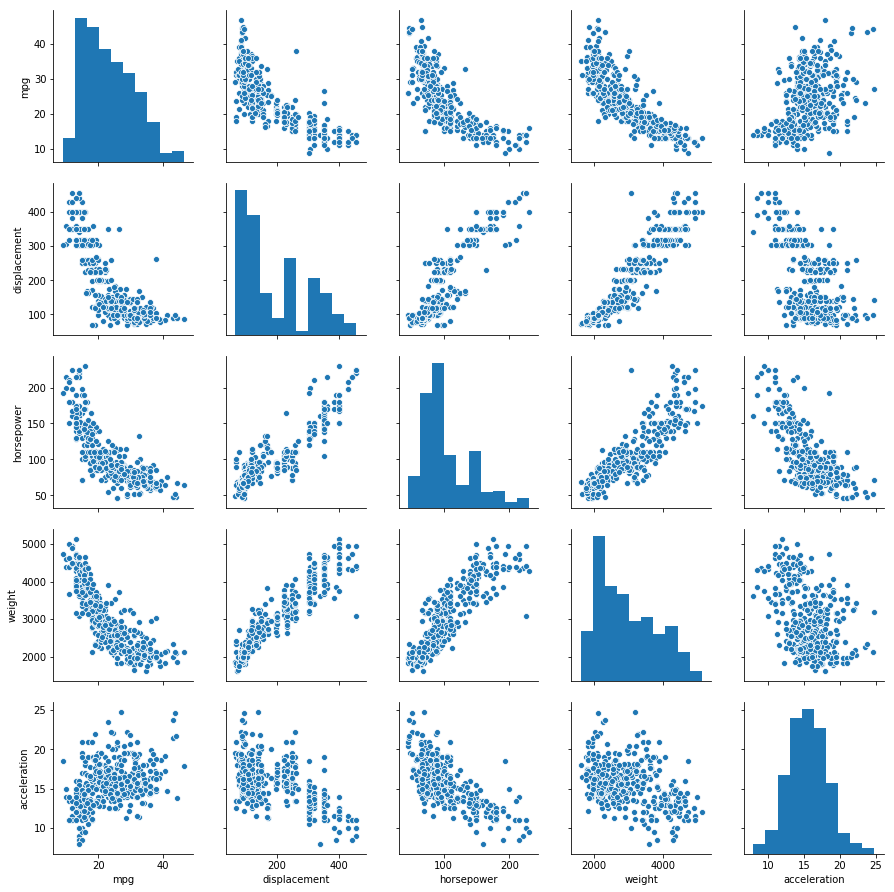

In [0]:
sns.pairplot(df[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration']])
plt.show()


Observation from the plots below
Mileage:
- Mileage has an inverse realtionship with Weight, horsepower, displacement
- Mile has no evident correlation with Acceleration 

others:
- Displacement has linear relationsip with weight, horsepower

We will have closer look on their relationships when hues with the catagorical variables

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


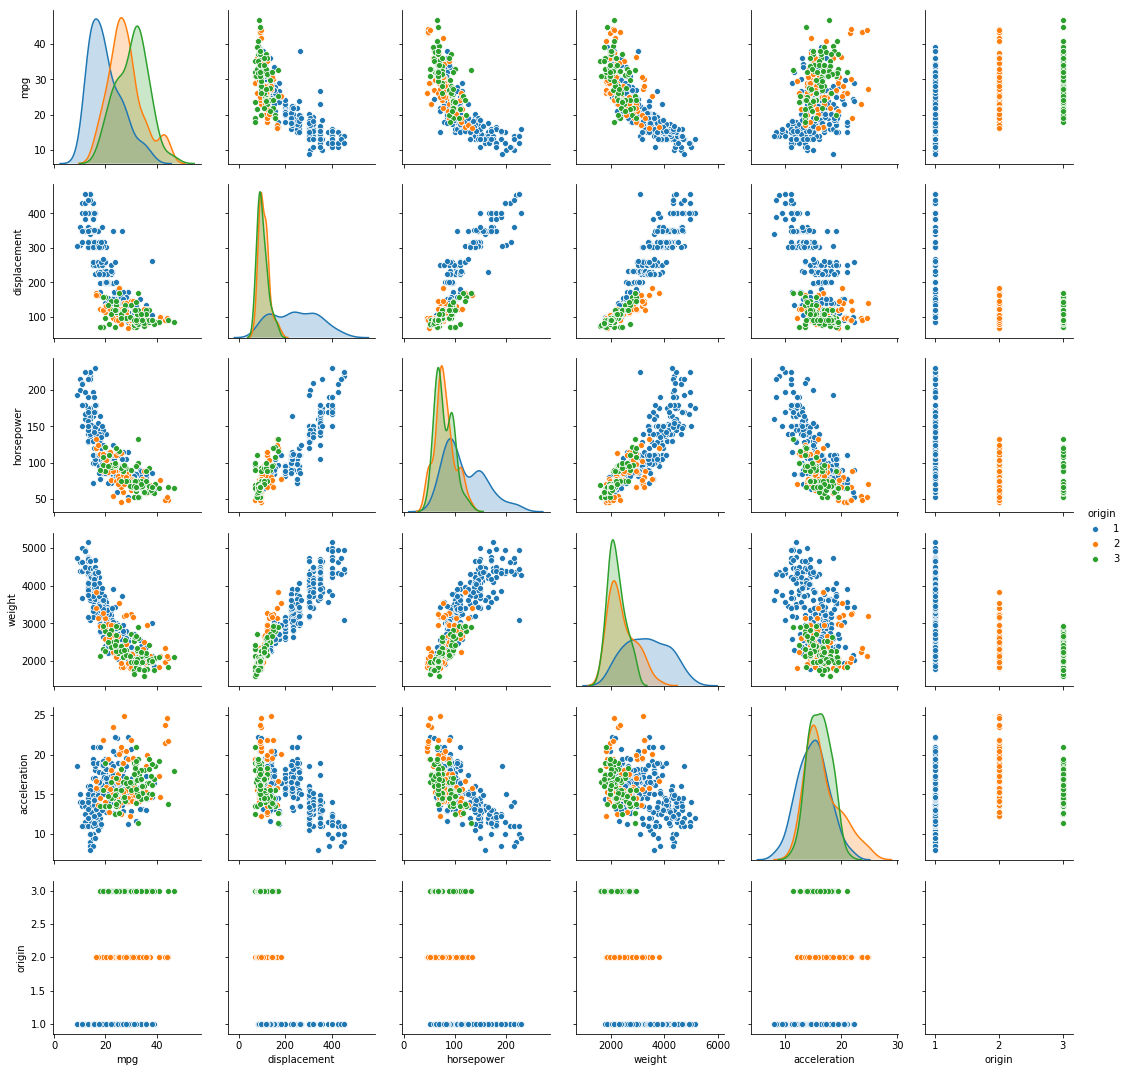

In [0]:
sns.pairplot(df[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration','origin']], hue = 'origin')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


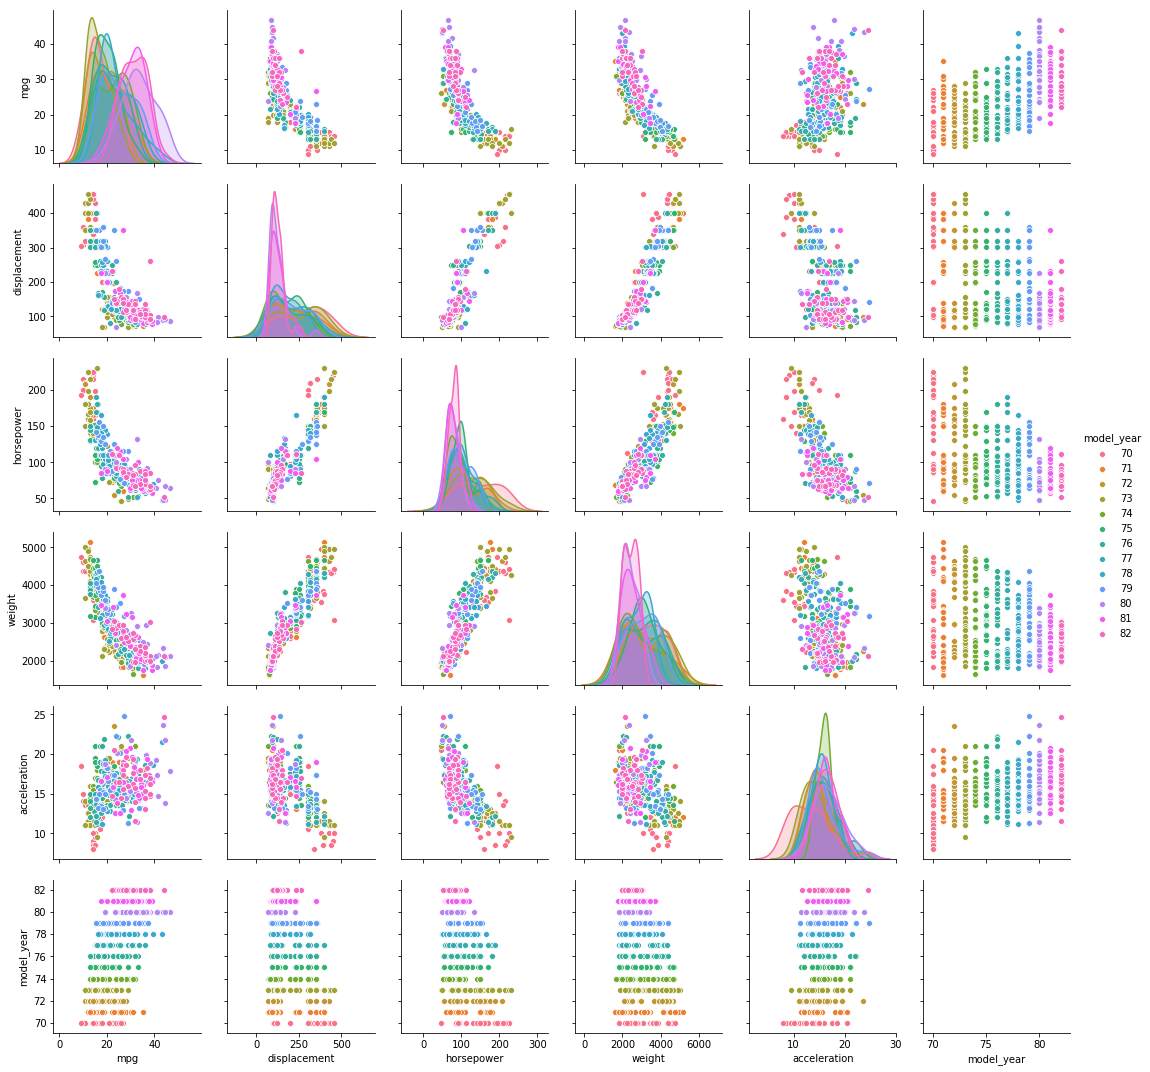

In [0]:
sns.pairplot(df[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration','model_year']], hue = 'model_year')
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


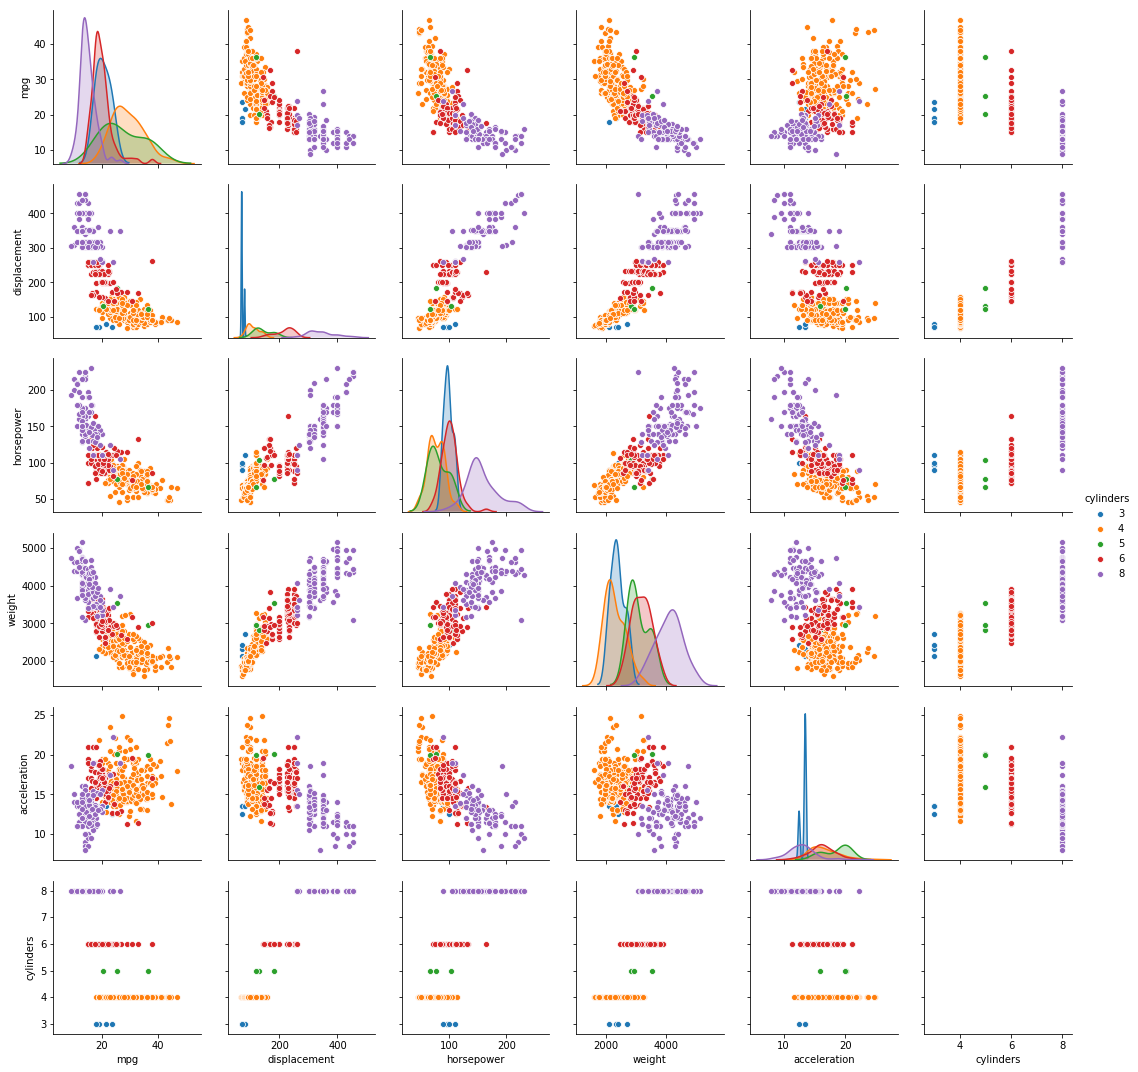

In [0]:
sns.pairplot(df[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration','cylinders']], hue = 'cylinders')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in l

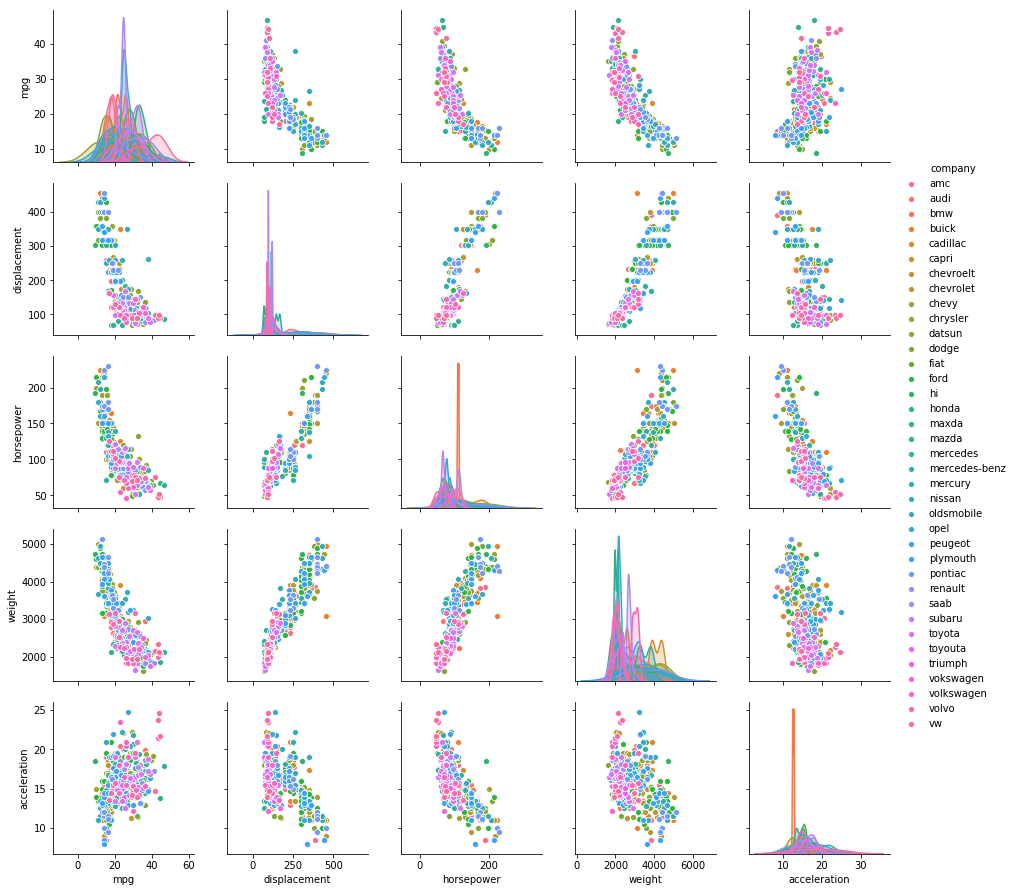

In [0]:
sns.pairplot(df[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration','company']], hue = 'company')
plt.show()

### Displacement vs mileage

- Continious feature

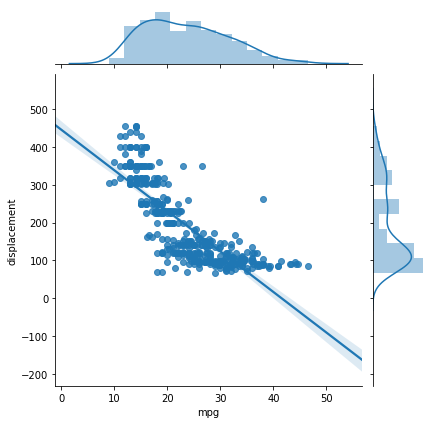

In [0]:
sns.jointplot(x='mpg',y='displacement',data=df, kind='reg')
# "scatter" | "reg" | "resid" | "kde" | "hex"
sns.set(style="ticks")
# Display the plot
plt.show()

In [0]:
#grid = sns.FacetGrid(df, row='cylinders', col = 'origin', size=2.5, aspect=1.6)
#grid.map(plt.scatter, "mpg", "displacement", alpha=.7)
#grid.add_legend()
#plt.show()

In [0]:
def Scatter_dist_vs_mpg(df, x = 'displacement', hue = 'cat_cyl'):
    number_of_colors = len(df[hue].unique())
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize = (16,12))
    patch = []
    for i, item in enumerate(df[hue].unique()):
        data = df[df[hue] == item]
        ax[0].scatter(data[x], data['mpg'],  c = color[i], marker ='o', s = 100)
        ax[1].scatter(1/data[x], data['mpg'], c = color[i], marker ='o', s = 100)
        patch.append(mpatches.Patch(color=color[i], label=hue +' = {}'.format(item)))
    ax[0].set_title('mpg vs {}'.format(x), fontsize=20)
    ax[0].set_xlabel('{}'.format(x), fontsize=20)
    ax[0].set_ylabel('mpg', fontsize=20)
    ax[1].set_title('mpg vs 1/{}'.format(x), fontsize=20)
    ax[1].set_xlabel('{}'.format(x), fontsize=20)
    ax[1].set_ylabel('mpg', fontsize=20)
    plt.legend(handles=patch)
    plt.show()
    
def sns_lmplot(df, y ='mpg', x = 'displacement', col = None, hue =None):
    data= df.copy()
    data['i_x'] = 1/data[x]
    sns.lmplot(x = x, y = 'mpg', data = data, col = col, hue = hue,sharex=False,sharey=False)
    sns.lmplot(x = 'i_x', y = 'mpg', data = data, col = col, hue = hue,sharex=False,sharey=False)
    plt.show()

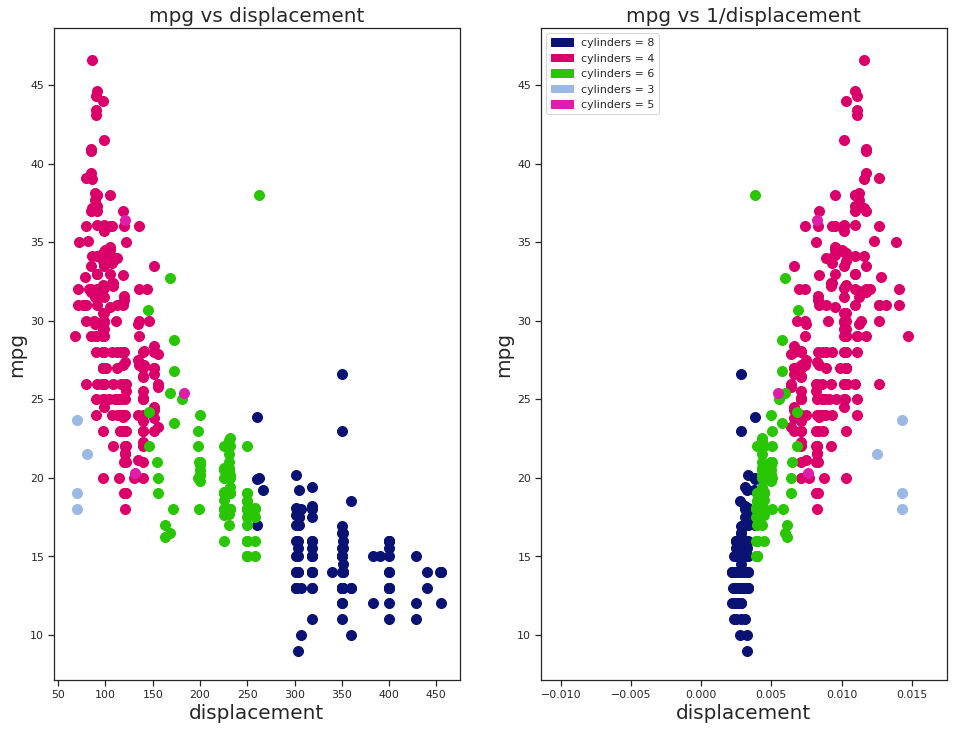

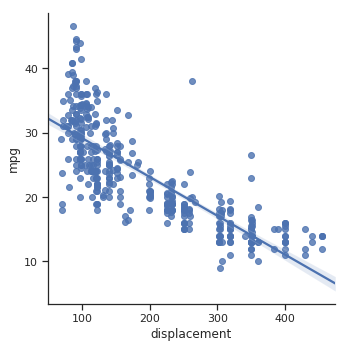

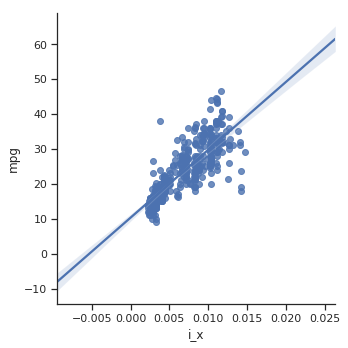

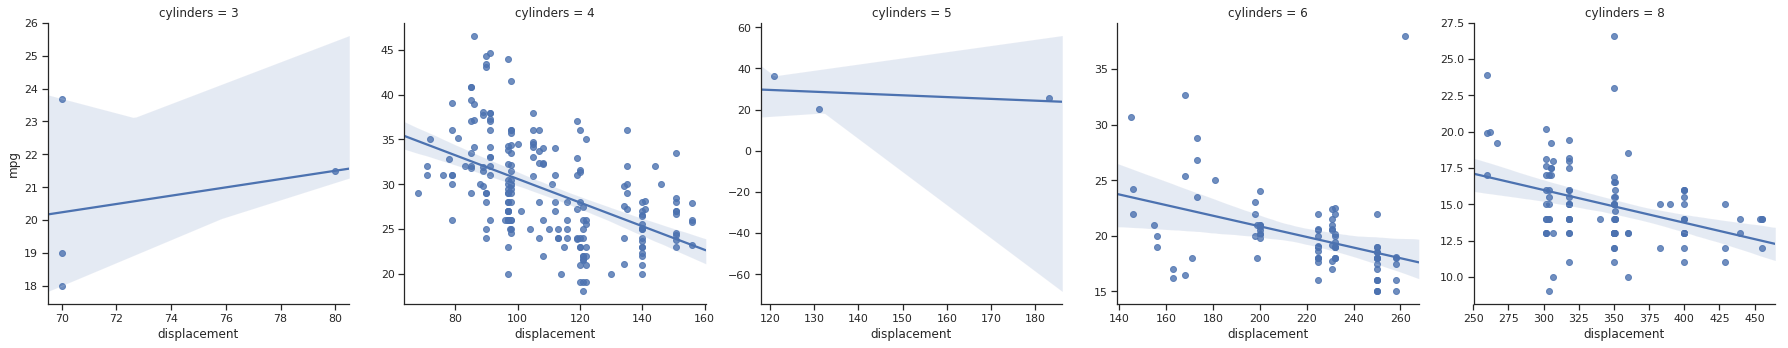

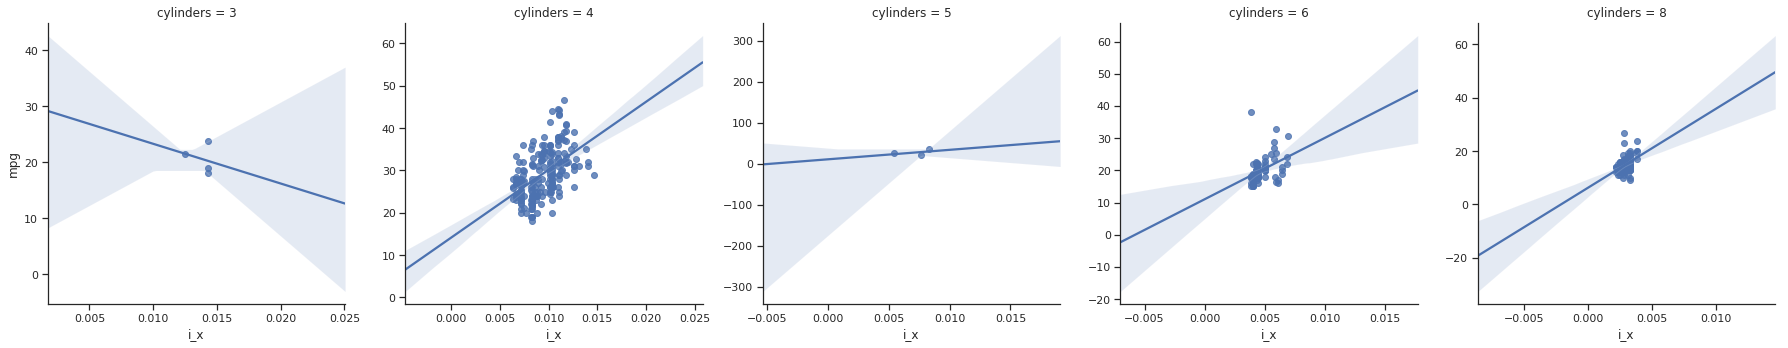

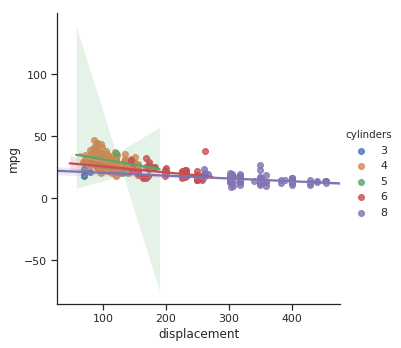

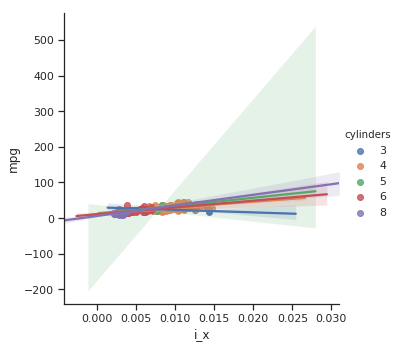

In [0]:
Scatter_dist_vs_mpg(df, x = 'displacement', hue = 'cylinders')
sns_lmplot(df, x = 'displacement')

sns_lmplot(df, x = 'displacement', col = 'cylinders')
sns_lmplot(df, x = 'displacement', hue = 'cylinders')

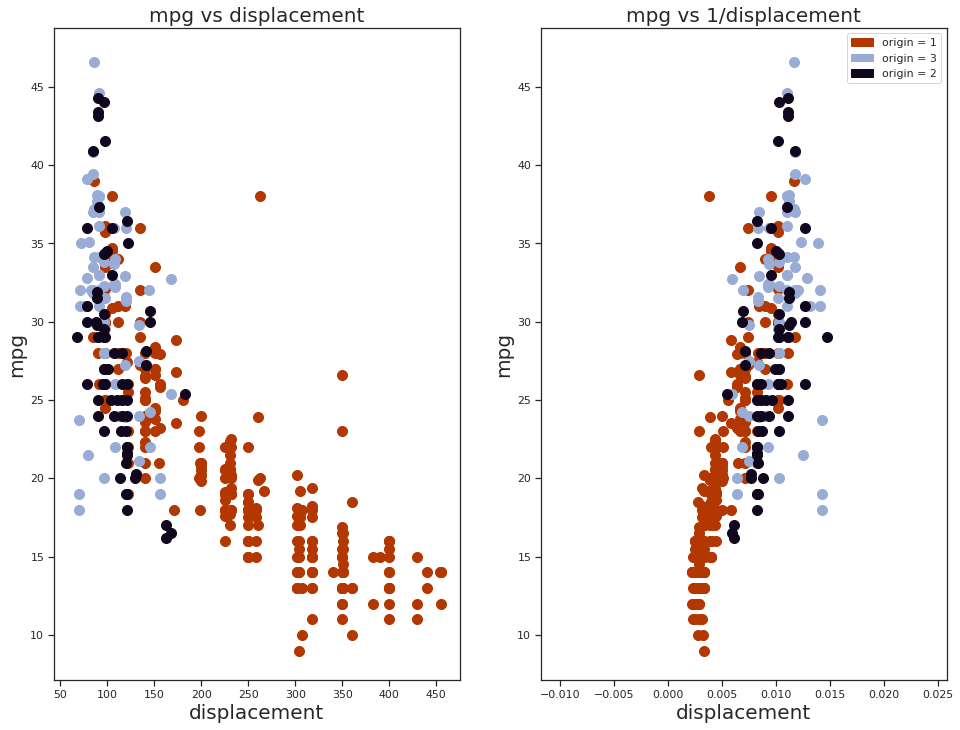

In [0]:
Scatter_dist_vs_mpg(df, hue = 'origin')

### Horsepower vs Mileage

- Continious feature

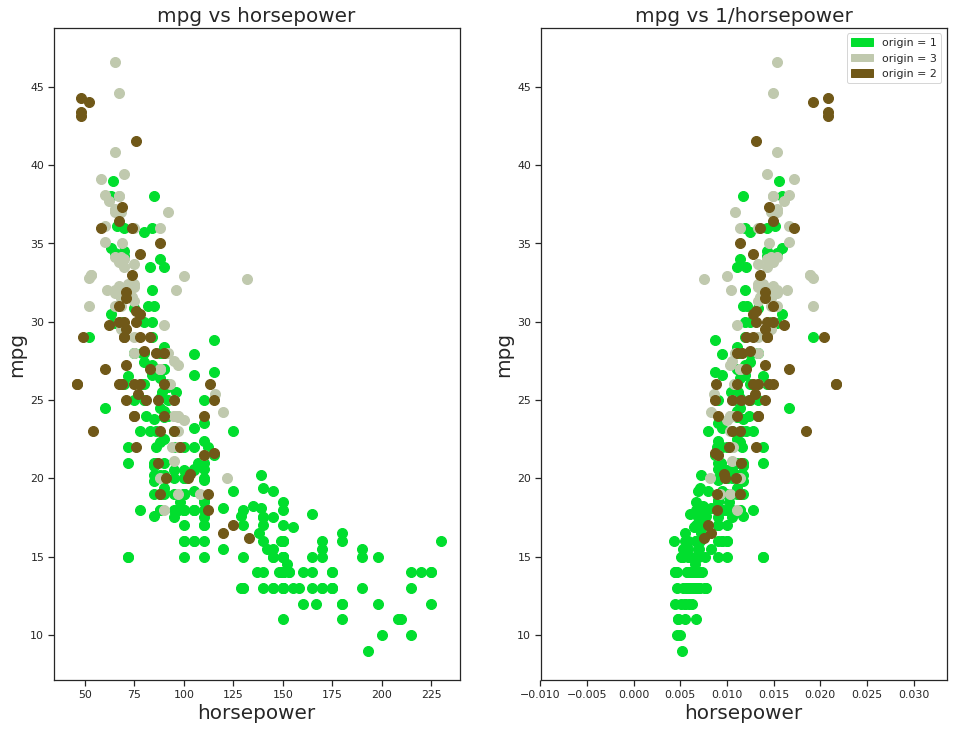

In [0]:
Scatter_dist_vs_mpg(df, x = 'horsepower', hue = 'origin')

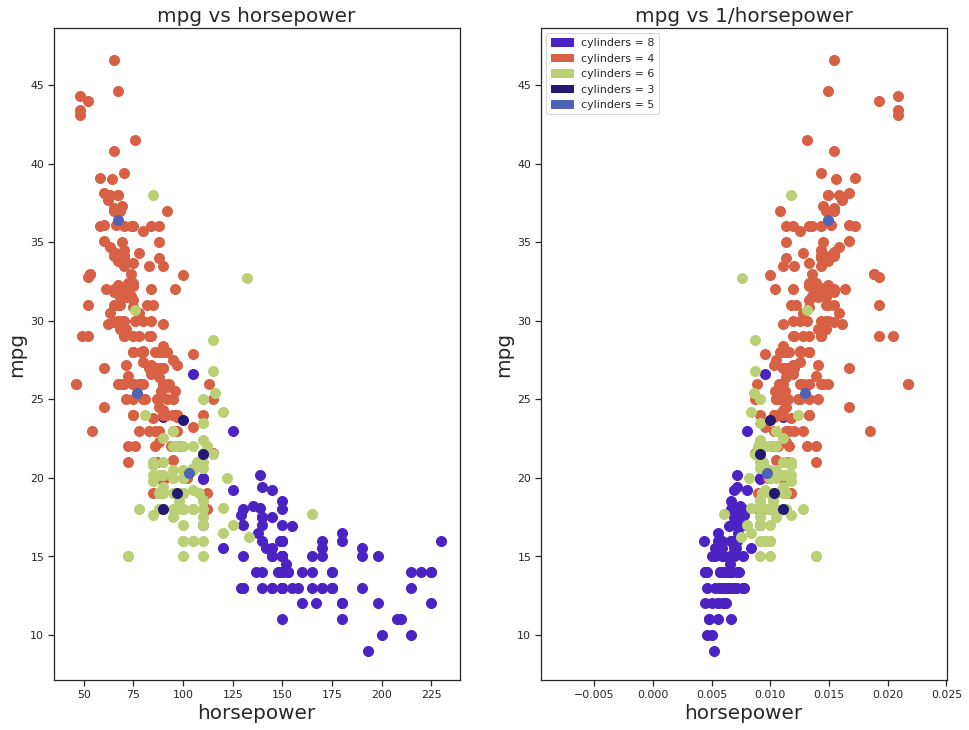

In [0]:
Scatter_dist_vs_mpg(df, x = 'horsepower', hue = 'cylinders')

In [0]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name', 'cat_cyl',
       'cat_org', 'cat_year', 'company', 'mpg_per_cyl'],
      dtype='object')

### Weight vs Mileage

- Continious feature

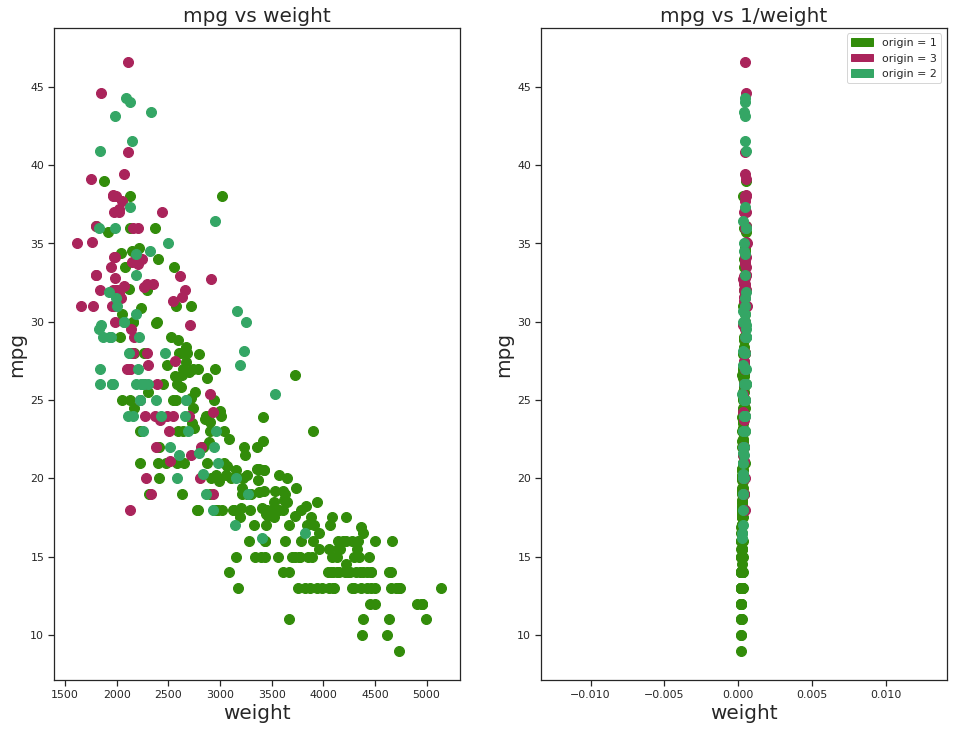

In [0]:
Scatter_dist_vs_mpg(df, x = 'weight', hue = 'origin')

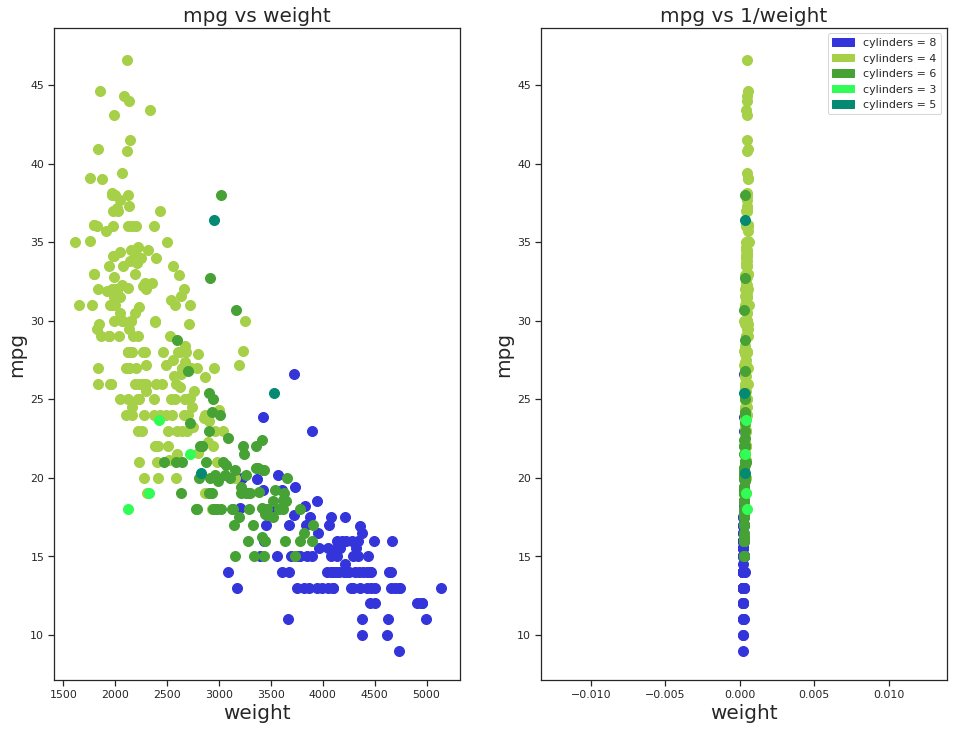

In [0]:
Scatter_dist_vs_mpg(df, x = 'weight', hue = 'cylinders')

### Aceleration vs Milege

- Continious feature

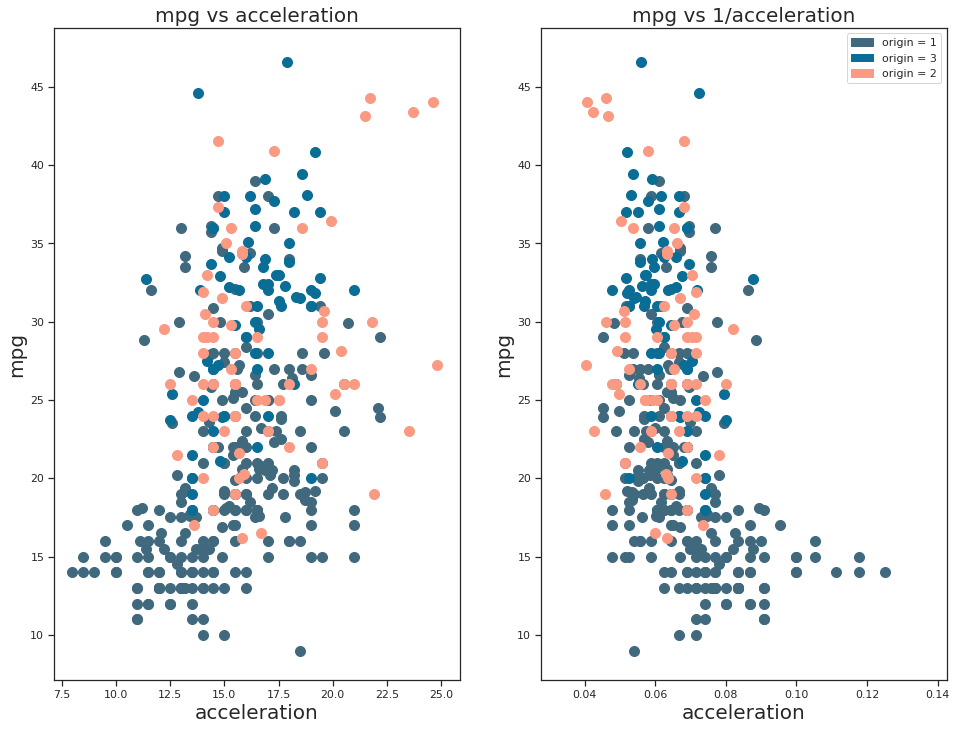

In [0]:
Scatter_dist_vs_mpg(df, x = 'acceleration', hue = 'origin')

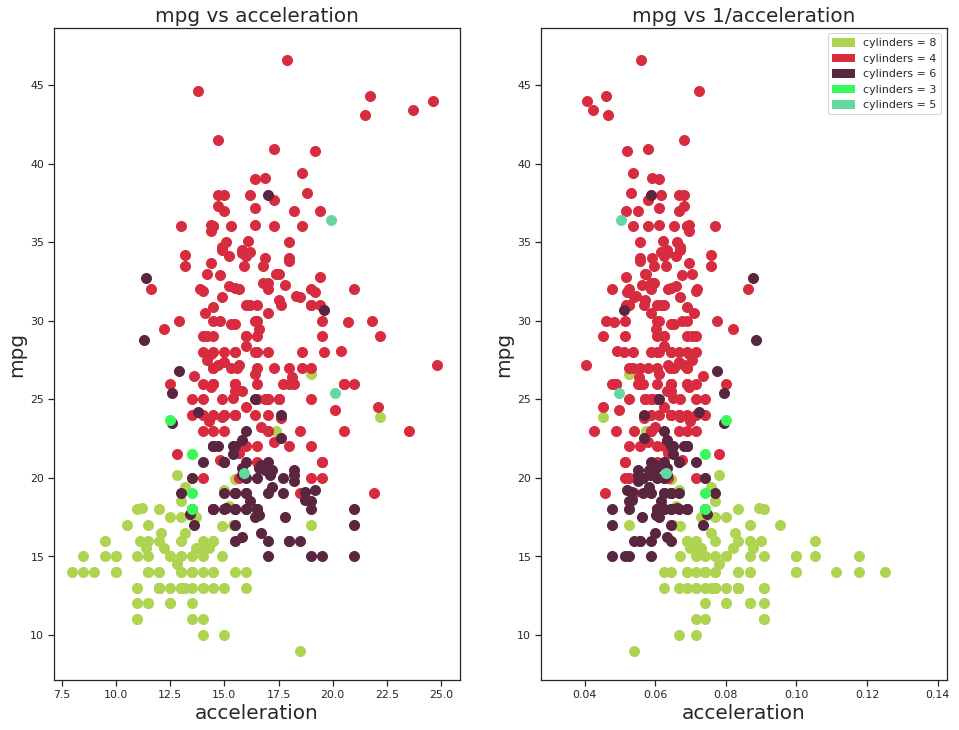

In [0]:
Scatter_dist_vs_mpg(df, x = 'acceleration', hue = 'cylinders')

# Preprocessing

In [0]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name', 'cat_cyl',
       'cat_org', 'cat_year', 'company', 'mpg_per_cyl'],
      dtype='object')

In [0]:
print('Work on progress')

Work on progress


# Predictions

In [0]:
print('Work on progress')

Work on progress
